In [32]:
import os

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision import transforms




from src.datasets import SatelliteImagesDataset, train_test_split

from src.path import DATA_TRAIN_IMG_PATH, MODELS_DIR, extract_archives
from src.path import DATA_TRAIN_GT_PATH

from src.plot_utils import plot_images


from numpy import asarray

NUM_EPOCHS = 100
MODEL_PATH = os.path.join(MODELS_DIR, 'convnet_model.pth')

from PIL import Image

In [33]:
dataset = SatelliteImagesDataset(
        img_dir=DATA_TRAIN_IMG_PATH,gt_dir=DATA_TRAIN_GT_PATH)

In [34]:
image, mask = dataset[0]
np_image = asarray(image)
np_mask = asarray(mask)




# Rotation

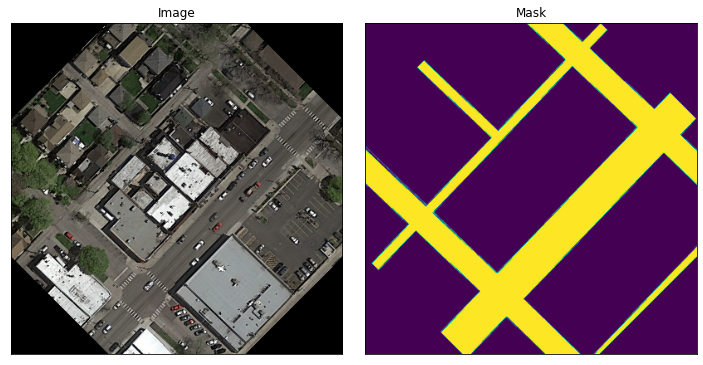

In [35]:
rotated_im = image.rotate(45)
rotated_mask= mask.rotate(45)
plot_images(rotated_im, rotated_mask)

np_im_rot = rotate(np_image,angle=45,mode = 'wrap')
    np_gt_rot = rotate(np_gt,angle=45,mode = 'wrap')
    img_rot = Image.fromarray(np_im_rot, 'RGB')
    gt_rot = Image.fromarray(np_gt_rot, 'L')

Rotated image


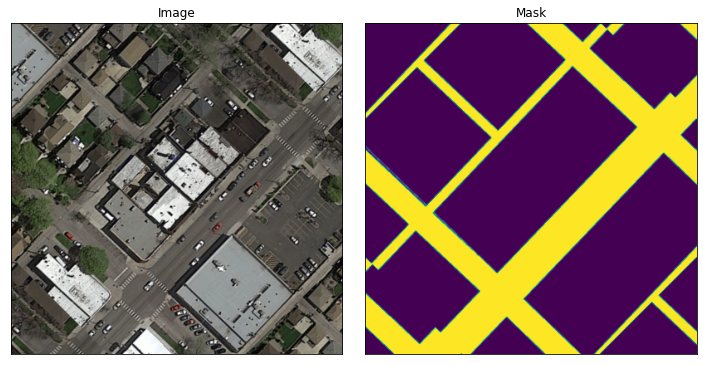

In [11]:
print('Rotated image')
rotated_im = rotate(np_image,angle =45, mode='wrap')
rotated_mask = rotate(np_mask,angle =45, mode='wrap')

#rotated_im = np.fliplr(image)
#rotated_mask=np.fliplr(mask)

img_rot = Image.fromarray(rotated_im, 'RGB')
gt_rot = Image.fromarray(rotated_mask, 'L')
    
plot_images(rotated_im, rotated_mask)




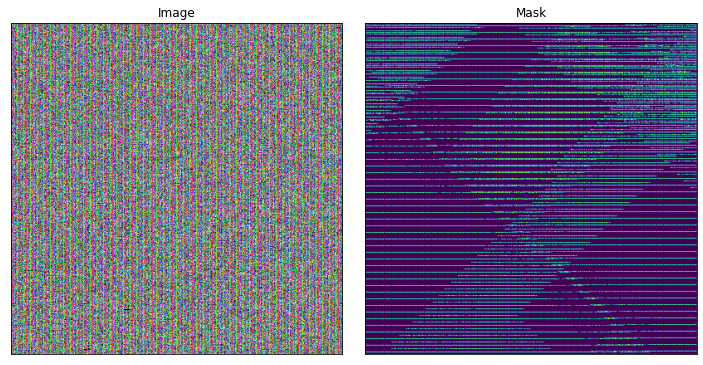

In [12]:
plot_images(img_rot, gt_rot)

# Affine Transform

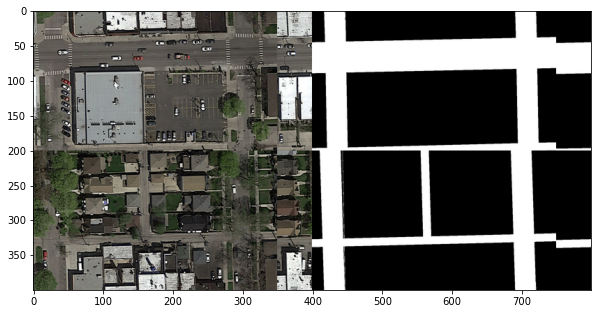

In [91]:
transform = AffineTransform(translation=(50,200))
wrapShift_im = warp(image,transform,mode='wrap')
wrapShift_mask = warp(mask,transform,mode='wrap')

plot_image_mask(wrapShift_im, wrapShift_mask)

# Flipping

Text(0.5, 1.0, 'Left to Right Flipped')

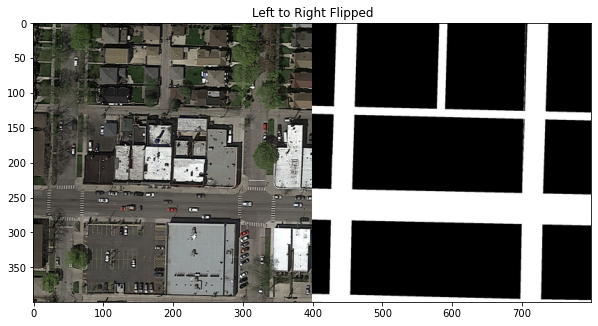

In [92]:
flipLR_im = np.fliplr(image)
flipLR_mask = np.fliplr(mask)

plot_image_mask(flipLR_im,flipLR_mask)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'up down Flipped')

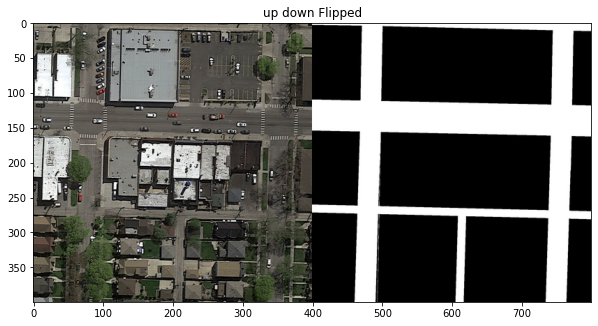

In [111]:
flipUD_im = np.flipud(image)
flipUD_mask = np.flipud(mask)

plot_image_mask(flipUD_im,flipUD_mask);
plt.title('up down Flipped')

# Noise

In [16]:
#standard deviation for noise to be added in the image
#increasing this value will add more noise to the image 
sigma=0.155 
torch.manual_seed(45)

In [24]:
noise = np.random.randint(5, size = (400, 400, 3), dtype = 'uint8')

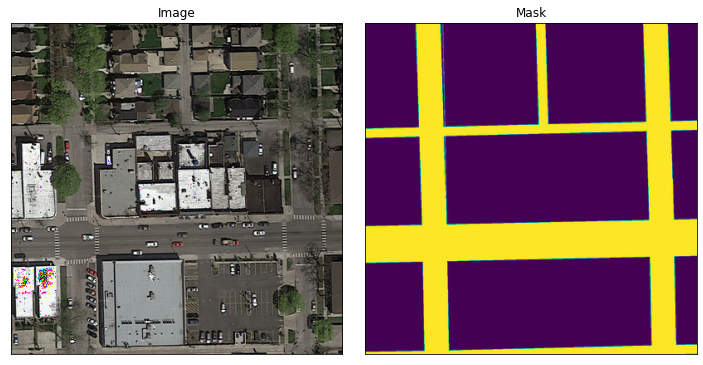

NameError: name 'AUGMENTED_IMAGES_DIR' is not defined

In [31]:
#add random noise to the image
npimg= np.array(image)
npmask=np.array(mask)
for i in range(400):
    for j in range(400):
        for k in range(3):
            if (npimg[i][j][k] != 255):
                npimg[i][j][k] += noise[i][j][k]
plot_images(npimg, npmask)     
pil_image=Image.fromarray(npimg)
pil_image.save(f"{AUGMENTED_IMAGES_DIR}/TEST_.png")

# Blurr


Text(0.5, 1.0, 'Blurred')

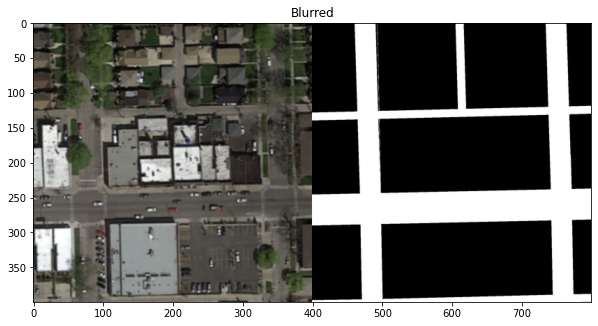

In [112]:
blurred_im = gaussian(image,sigma=1,multichannel=True)
plot_image_mask(blurred_im,mask)
plt.title('Blurred')

In [116]:
    #---------Flip Left-Right--------
    np_im_flip = np.fliplr(np_image)
    np_gt_flip = np.fliplr(np_gt)
    img_flip = Image.fromarray(np_im_flip, 'RGB')
    gt_flip = Image.fromarray(np_gt_flip, 'L')
    img_flip.save(f"{AUGMENTED_IMAGES_DIR}/satImage_FlipLR_{i}.png")
    gt_flip.save(f"{AUGMENTED_GT_DIR}/satImage_FlipLR_{i}.png")
    
    #---------Flip Up-Down ---------
    im_flipUD= image.transpose(Image.FLIP_TOP_BOTTOM)
    gt_flipUD= mask.transpose(Image.FLIP_TOP_BOTTOM)
    im_flipUD.save(f"{AUGMENTED_IMAGES_DIR}/satImage_FlipUD_{i}.png")
    gt_flipUD.save(f"{AUGMENTED_GT_DIR}/satImage_FlipUD_{i}.png")
    
    #---------Rotate-----------------
    img_rot = image.rotate(45)
    gt_rot= mask.rotate(45)
    img_rot.save(f"{AUGMENTED_IMAGES_DIR}/satImage_Rot_{i}.png")
    gt_rot.save(f"{AUGMENTED_GT_DIR}/satImage_Rot_{i}.png")
    
    #---------Random Noise------------
    np_im_noise = np_image
    
    for f in range(400):
        for j in range(400):
            for k in range(3):
                if (np_im_noise[f][j][k] != 255):
                    np_im_noise[f][j][k] += noise[f][j][k]
    
    img_noise = Image.fromarray(np_im_noise, 'RGB')
    img_noise.save(f"{AUGMENTED_IMAGES_DIR}/satImage_Noise{i}.png")
    #No change for the mask
    mask.save(f"{AUGMENTED_GT_DIR}/satImage_Noise{i}.png")
    
    #--------Blurr----------------------
    
    img_blurr = image.filter(ImageFilter.BLUR)
    
    img_blurr.save(f"{AUGMENTED_IMAGES_DIR}/satImage_Blurr{i}.png")
    #No change for the Mask
    mask.save(f"{AUGMENTED_GT_DIR}/satImage_Blurr{i}.png")
    
    #-------CROP------------------------
    im_crop = image.crop(box)
    gt_crop = mask.crop(box)
    im_crop.save(f"{AUGMENTED_IMAGES_DIR}/satImage_Crop_{i}.png")
    gt_crop.save(f"{AUGMENTED_GT_DIR}/satImage_Crop_{i}.png")


AttributeError: 'SatelliteImagesTrainDataset' object has no attribute 'head'